# Hyperparameter Tuning


In [1]:
from data import load_data

train_data, test_data = load_data()

unique_patients = test_data['p_num'].unique()
train_data = train_data[train_data['p_num'].isin(unique_patients)]
test_data = test_data[test_data['p_num'].isin(unique_patients)]

train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


### Define a tuning function

In [2]:
import joblib
import os


def tune(p_num, tuner, X, y):
    model_file_name = f'{p_num}.{tuner.__name__}.model.pkl'
    if os.path.exists(model_file_name):
        print(f'Model {model_file_name} already exists. Skipping...')
        return

    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X, y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), model_file_name)

Model p01.XGBRegressor.model.pkl already exists. Skipping...
Model p02.XGBRegressor.model.pkl already exists. Skipping...
Model p04.XGBRegressor.model.pkl already exists. Skipping...
Model p05.XGBRegressor.model.pkl already exists. Skipping...
Model p06.XGBRegressor.model.pkl already exists. Skipping...
Model p10.XGBRegressor.model.pkl already exists. Skipping...
Model p11.XGBRegressor.model.pkl already exists. Skipping...
Model p12.XGBRegressor.model.pkl already exists. Skipping...
Model p15.XGBRegressor.model.pkl already exists. Skipping...
Model p16.XGBRegressor.model.pkl already exists. Skipping...
Model p18.XGBRegressor.model.pkl already exists. Skipping...
-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 2.0965395679566385e-10),
             ('colsample_bytree', 0.9724826357691834),
             ('gamma', 0),
             ('lambda', 0.029121172222960522),
             ('learning_rate', 0.012336616832265264),
             ('max_depth', 15),
             ('min_child_weight', 10),
             ('n_estimators', 671),
             ('scale_pos_weight', 36),
             ('subsample', 0.7746186984231783)])

RMSE: 0.18176873042817338
RMSE: 0.18176873042817338
R2 Score: 0.9953716101356889


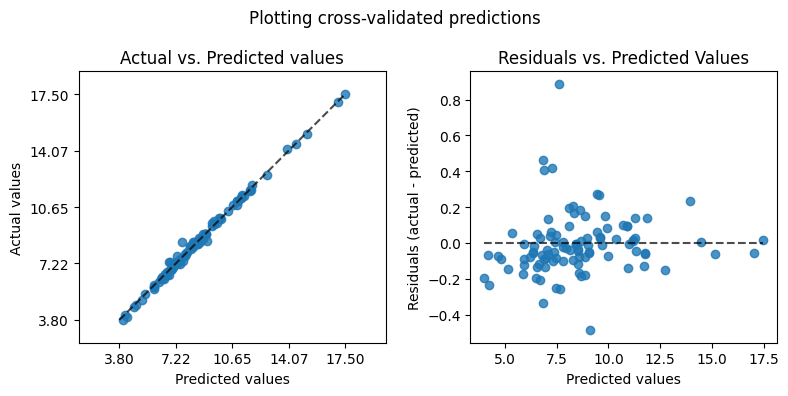

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 0.49218278343168703),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 0.08334499253880163),
             ('learning_rate', 0.017191900774319847),
             ('max_depth', 15),
             ('min_child_weight', 1),
             ('n_estimators', 747),
             ('scale_pos_weight', 40),
             ('subsample', 0.8497250969867454)])

RMSE: 0.04936808734395253
RMSE: 0.04936808734395253
R2 Score: 0.9998545195866662


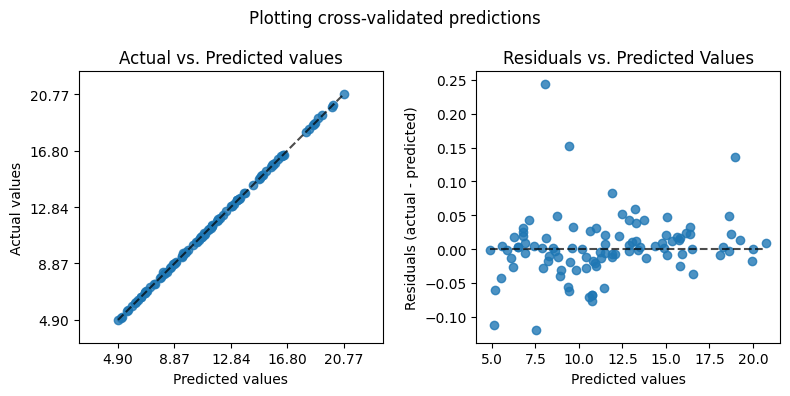

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 4.921882411071283e-10),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 2.4700382252111137e-07),
             ('learning_rate', 0.03849461557003664),
             ('max_depth', 12),
             ('min_child_weight', 10),
             ('n_estimators', 607),
             ('scale_pos_weight', 100),
             ('subsample', 0.6524191692051188)])

RMSE: 0.09889250510168798
RMSE: 0.09889250510168798
R2 Score: 0.9987619503663975


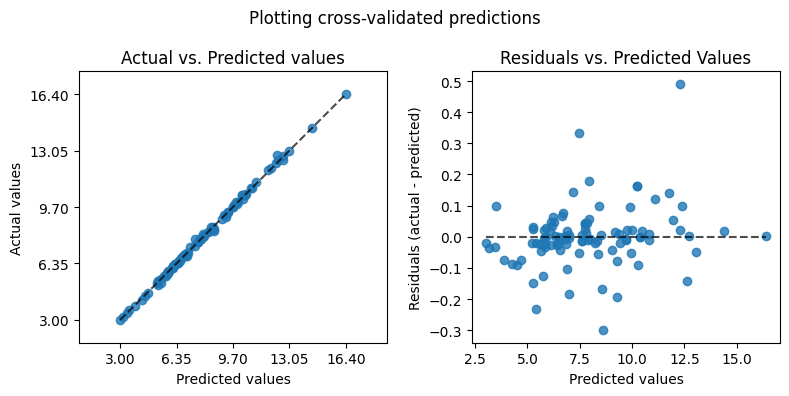

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1.2964562811170257e-08),
             ('colsample_bytree', 0.7022015417536571),
             ('gamma', 0),
             ('lambda', 2.1283028006504622e-08),
             ('learning_rate', 0.02690792713449214),
             ('max_depth', 9),
             ('min_child_weight', 2),
             ('n_estimators', 1000),
             ('scale_pos_weight', 100),
             ('subsample', 0.5)])

RMSE: 0.07781454258539093
RMSE: 0.07781454258539093
R2 Score: 0.9989852944088605


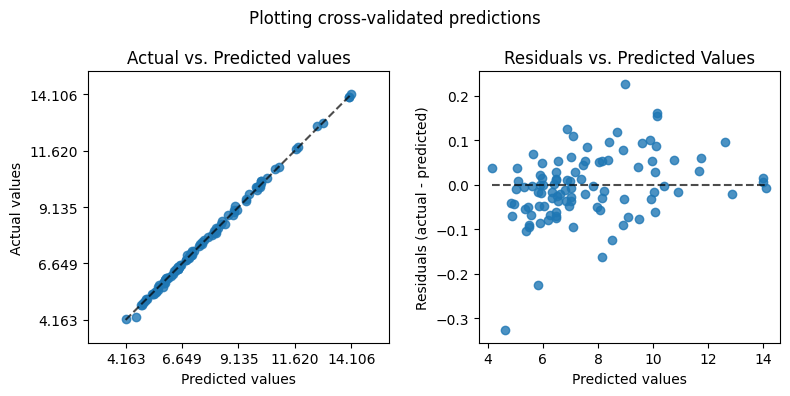

In [3]:
from pipelines import pipeline
from src.features.tuners import XGBHyperparameterTuner

for patient in unique_patients:
    patient_train_data = train_data[train_data['p_num'] == patient]
    patient_train_data_transformed = pipeline.fit_transform(patient_train_data)

    X_train = patient_train_data_transformed.drop(columns=['bg+1:00'])
    y_train = patient_train_data_transformed['bg+1:00']

    tune(patient, XGBHyperparameterTuner(search_space='deep'), X_train, y_train)